#Climate Trends Exploration



Basic EDA on global temperature rise, CO₂ levels, and urban-related indicators.  

Goal: Visualize long-term trends and correlations to understand climate impacts on cities/sustainability.



Datasets:

- Global temperature anomalies ([NASA GISS](https://data.giss.nasa.gov/gistemp/))

- Atmospheric CO₂ ([NOAA](https://gml.noaa.gov/ccgg/trends/data.html))

- Optional: Urban population / emissions ([World Bank / Our World in Data](https://data.worldbank.org/topic/urban-development))



In [4]:
#Import

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [5]:
#Load data

# Example: Load NASA GISS temperature data (CSV from https://data.giss.nasa.gov/gistemp/)

# Download manually or use direct URL if small

url_temp = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv" # Adjust if needed

df_temp = pd.read_csv(url_temp, skiprows=1) # Skip header rows

In [6]:
# Clean & melt for plotting

df_temp = df_temp[df_temp['Year'] > 0] # Remove invalid rows

df_temp_long = df_temp.melt(id_vars=['Year'], value_vars=df_temp.columns[1:13], var_name='Month', value_name='Anomaly')



print(df_temp_long.head())

   Year Month  Anomaly
0  1880   Jan    -0.19
1  1881   Jan    -0.20
2  1882   Jan     0.15
3  1883   Jan    -0.30
4  1884   Jan    -0.13


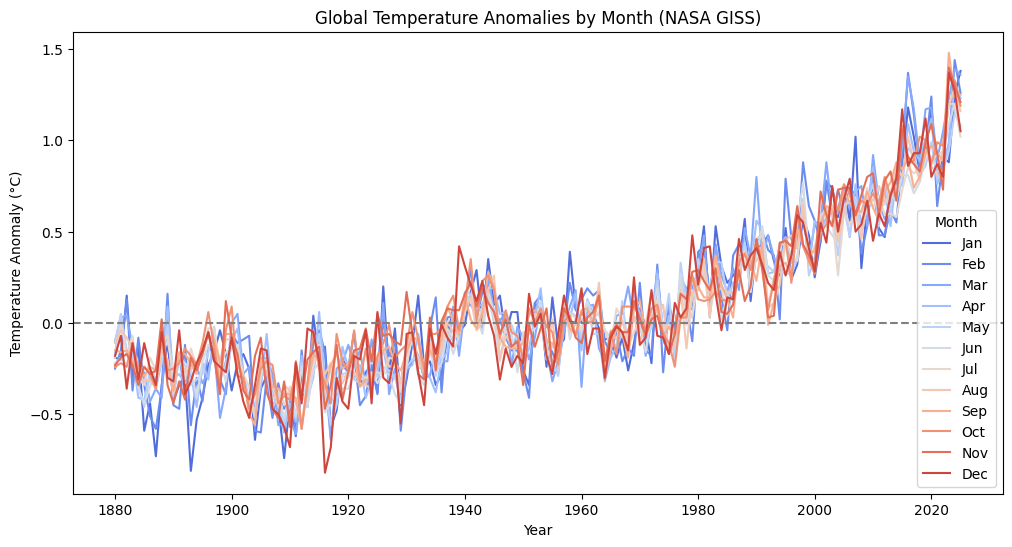

In [7]:
#Basic Plots Global Tempratures
plt.figure(figsize=(12,6))

sns.lineplot(data=df_temp_long, x='Year', y='Anomaly', hue='Month', palette='coolwarm')

plt.title('Global Temperature Anomalies by Month (NASA GISS)')

plt.ylabel('Temperature Anomaly (°C)')

plt.axhline(0, color='gray', linestyle='--')

plt.show()

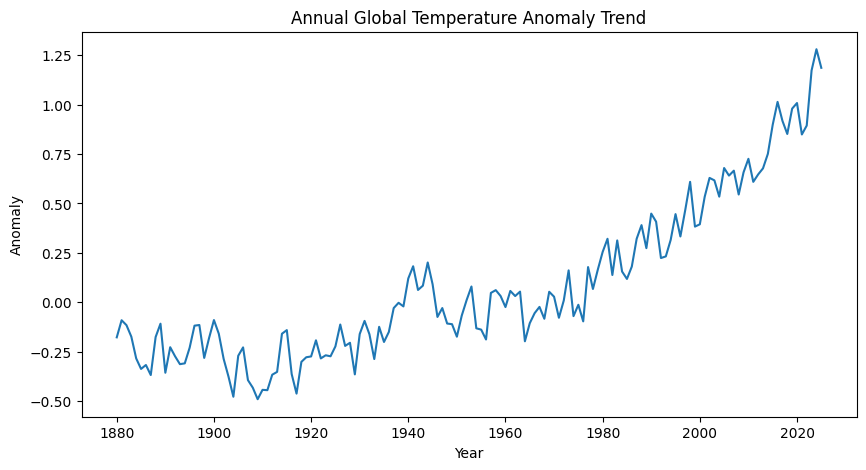

In [8]:
# Annual average

annual_avg = df_temp_long.groupby('Year')['Anomaly'].mean().reset_index()

plt.figure(figsize=(10,5))

sns.lineplot(data=annual_avg, x='Year', y='Anomaly')

plt.title('Annual Global Temperature Anomaly Trend')

plt.show()

## Key Observations

- Clear upward trend in temperature anomalies since 1880s.

- Recent decades show acceleration — urban areas often amplify heat (urban heat island effect).

- Upcomming Next steps: Add CO₂ data, correlate with urban growth indicators, or focus on cities.



References:

[1] NASA GISS, (https://data.giss.nasa.gov/gistemp/)

[2] NOAA, (https://gml.noaa.gov/ccgg/trends/data.html)

[3] World Bank Urban Data Portal (https://data.worldbank.org/topic/urban-development)